In [2]:
%matplotlib inline
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)

In [3]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]



In [4]:
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [5]:
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000,
        -4.0000,  6.0000, 13.0000, 21.0000])

In [6]:
t_u

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000])

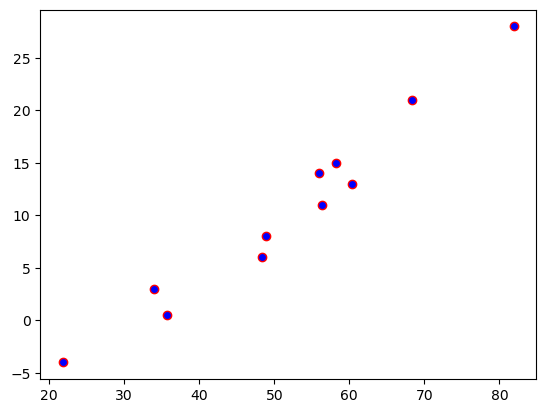

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(t_u, t_c, c="b", edgecolors="r")
plt.show()


In [8]:
def model(t_u, w, b):
    return w * t_u + b

In [9]:
# loss: 2 ways to calculate the loss function
# 1. |t_p - t_c|
# 2. (t_p - t_c)^2 (x)

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [10]:
# first trial
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000])

In [11]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [12]:
# second trial
w = torch.zeros(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
loss = loss_fn(t_p, t_c)
loss

tensor(187.3864)

In [14]:
# dloss func
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

# grad func
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([
        dloss_dw.sum(),
        dloss_db.sum(),
    ])
    

In [15]:
# learning rate: 0.01 ~ 0.0001
# 100 times lower before finish
learning_rate = 1e-2
delta = 0.1

# adjust w
loss_rate_of_change_w = (
    loss_fn(
        model(t_u, w + delta, b),
        t_c
    ) - loss_fn(
        model(t_u, w - delta, b),
        t_c
    )
) / (2.0 * delta)
w = w - learning_rate * loss_rate_of_change_w

# adjust b
loss_rate_of_change_b = (
    loss_fn(
        model(t_u, w, b + delta),
        t_c
    ) - loss_fn(
        model(t_u, w, b - delta),
        t_c
    )
) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

In [17]:
# training loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        w,b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        print("Epoch %d, Loss %f" % (epoch, float(loss)))
    return params

In [27]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-5,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c,
)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 1565.761353
Epoch 3, Loss 1390.265503
Epoch 4, Loss 1234.812378
Epoch 5, Loss 1097.112793
Epoch 6, Loss 975.139709
Epoch 7, Loss 867.096741
Epoch 8, Loss 771.393005
Epoch 9, Loss 686.619385
Epoch 10, Loss 611.527405
Epoch 11, Loss 545.011597
Epoch 12, Loss 486.092102
Epoch 13, Loss 433.901764
Epoch 14, Loss 387.671875
Epoch 15, Loss 346.721710
Epoch 16, Loss 310.448425
Epoch 17, Loss 278.317719
Epoch 18, Loss 249.856598
Epoch 19, Loss 224.645859
Epoch 20, Loss 202.314407
Epoch 21, Loss 182.533356
Epoch 22, Loss 165.011398
Epoch 23, Loss 149.490631
Epoch 24, Loss 135.742371
Epoch 25, Loss 123.564278
Epoch 26, Loss 112.776932
Epoch 27, Loss 103.221649
Epoch 28, Loss 94.757591
Epoch 29, Loss 87.260178
Epoch 30, Loss 80.619034
Epoch 31, Loss 74.736320
Epoch 32, Loss 69.525452
Epoch 33, Loss 64.909691
Epoch 34, Loss 60.821049
Epoch 35, Loss 57.199379
Epoch 36, Loss 53.991299
Epoch 37, Loss 51.149609
Epoch 38, Loss 48.632435
Epoch 39, Loss 46.402737
Ep

tensor([ 0.2340, -0.0165])

In [30]:
# normalize t_u with 0.1
t_un = 0.1 * t_u
params = training_loop(
    n_epochs = 3000,
    learning_rate = 1e-2, # now we can use larger learning rate
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c,
)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

Epoch 2287, Loss 2.938971
Epoch 2288, Loss 2.938933
Epoch 2289, Loss 2.938893
Epoch 2290, Loss 2.938857
Epoch 2291, Loss 2.938820
Epoch 2292, Loss 2.938779
Epoch 2293, Loss 2.938743
Epoch 2294, Loss 2.938705
Epoch 2295, Loss 2.938667
Epoch 2296, Loss 2.938629
Epoch 2297, Loss 2.938593
Epoch 2298, Loss 2.938555
Epoch 2299, Loss 2.938519
Epoch 2300, Loss 2.938481
Epoch 2301, Loss 2.938444
Epoch 2302, Loss 2.938408
Epoch 2303, Loss 2.938371
Epoch 2304, Loss 2.938335
Epoch 2305, Loss 2.938299
Epoch 2306, Loss 2.938263
Epoch 2307, Loss 2.938227
Epoch 2308, Loss 2.938190
Epoch 2309, Loss 2.938155
Epoch 2310, Loss 2.938118
Epoch 2311, Loss 2.938084
Epoch 2312, Loss 2.938049
Epoch 2313, Loss 2.938014
Epoch 2314, Loss 2.937977
Epoch 2315, Loss 2.937943
Epoch 2316, Loss 2.937908
Epoch 2317, Loss 2.937872
Epoch 2318, Loss 2.937839
Epoch 2319, Loss 2.937804
Epoch 2320, Loss 2.937769
Epoch 2321, Loss 2.937734
Epoch 2322, Loss 2.937700
Epoch 2323, Loss 2.937665
Epoch 2324, Loss 2.937632
Epoch 2325, 

In [31]:
# normaliztion
# 1. batch - image
# 2. layer - txt
# 3. instance - gan
# 4. group - bn with small batch of data

# why not use multiple learning rate, it's too expensive!!!

In [36]:
params

tensor([  5.3489, -17.1980])

tensor([  5.3489, -17.1980])

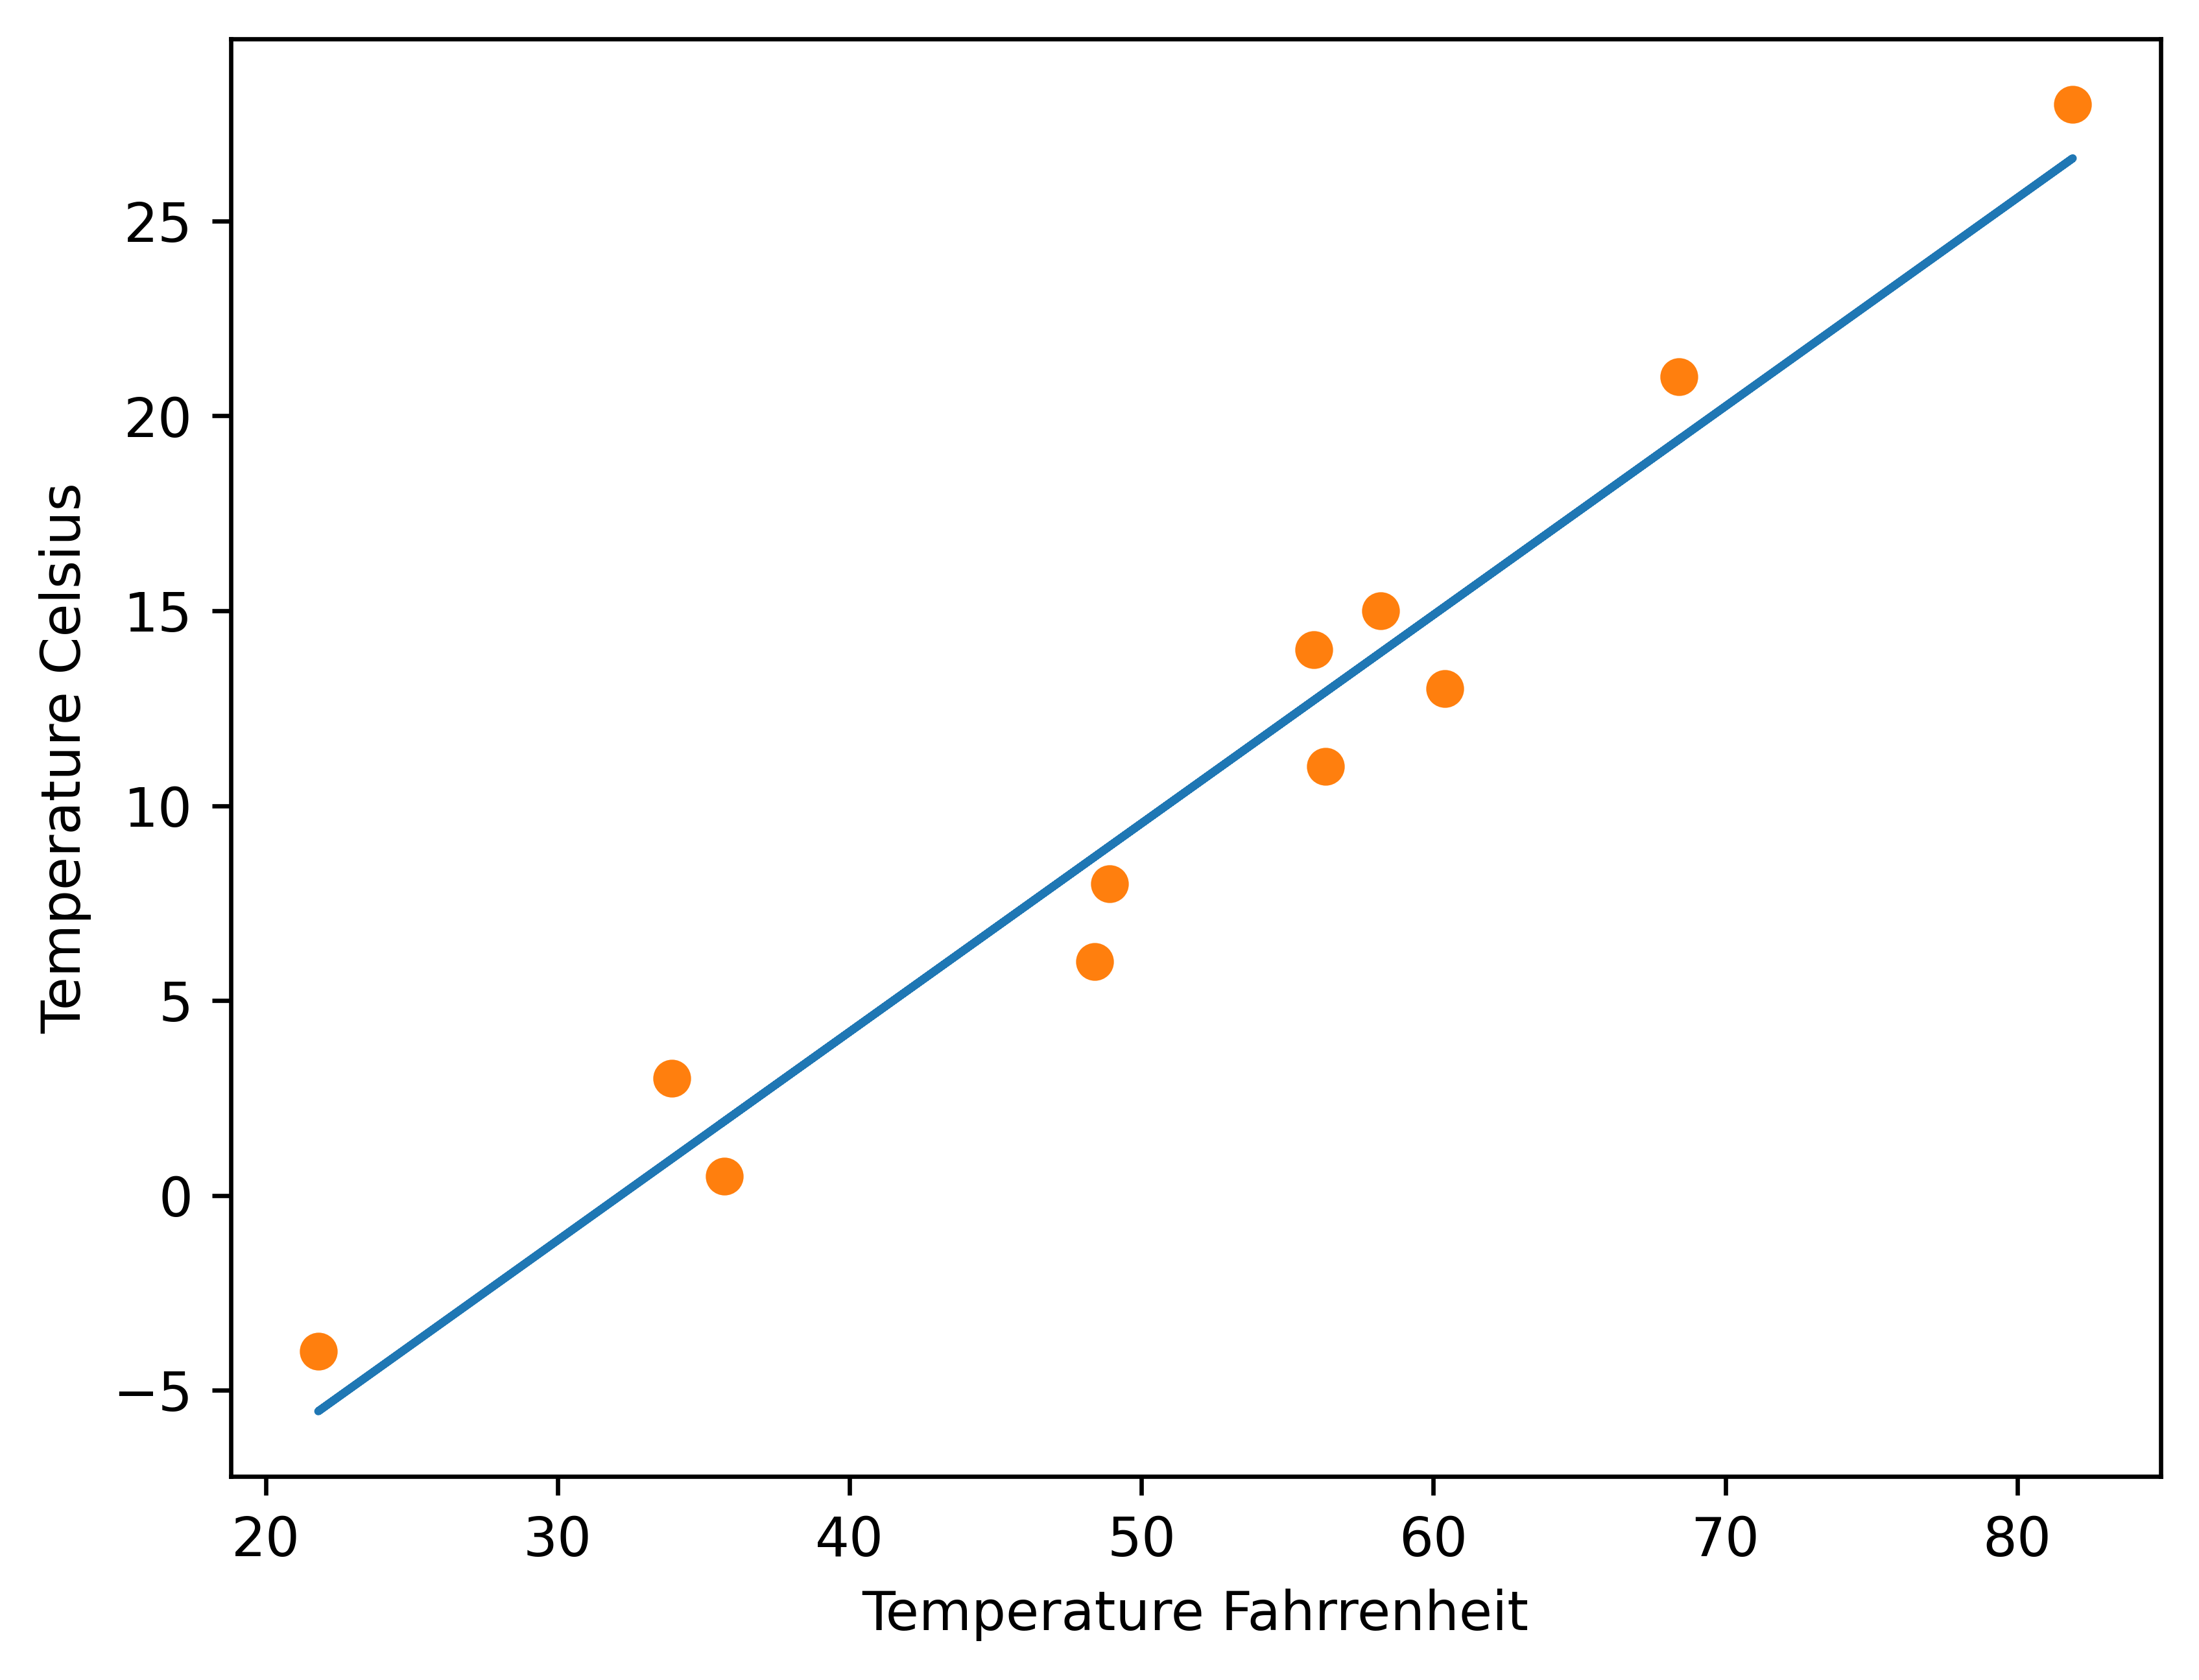

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

t_p = model(t_un, *params)
fig = plt.figure(dpi=600)

plt.xlabel("Temperature Fahrrenheit")
plt.ylabel("Temperature Celsius")

plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), "o")

plt.savefig("temp_unknow_plot.png", format="png")


In [45]:
# use pytroch to get params grad
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1 * t_u

def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)

# loss = loss_fn(model(t_u, *params), t_c)
# loss.backward()
# params.grad

tensor([4517.2969,   82.6000])

In [49]:
def traning_loop_v2(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
            
        if epoch % 500 == 0:
            print("Epoch %d, Loss %f" % (epoch, float(loss)))
    return params

In [52]:
params = traning_loop_v2(
    n_epochs = 3000,
    learning_rate = 1e-2,
    params = params,
    t_u = t_un,
    t_c = t_c,
)

Epoch 500, Loss 7.864031
Epoch 1000, Loss 3.829258
Epoch 1500, Loss 3.092322
Epoch 2000, Loss 2.957722
Epoch 2500, Loss 2.933140
Epoch 3000, Loss 2.928649


In [60]:
# use optimizer
import torch.optim as optim

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

# t_p = model(t_u, *params)
# loss = loss_fn(t_p, t_c)
# loss.backward()

# optimizer.step()
# params

In [61]:
def traning_loop_v3(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print("Epoch %d, Loss %f" % (epoch, float(loss)))
    return params

In [62]:
params = traning_loop_v3(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c,
)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


In [67]:
# use pytorch nn
# tanh

%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [69]:
n_samples = t_u.shape[0]
n_samples

11

In [99]:
n_val = int(0.2 * n_samples) # 2

shuffled_indices = torch.randperm(n_samples) # 11 elements
train_indices = shuffled_indices[:-n_val] # train: 9 elements
val_indices = shuffled_indices[-n_val:] # validate: 2 elements

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

# normalized
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [78]:
import torch.nn as nn

linear_model = nn.Linear(1,1) # input tensor size & output tensor size
linear_model(t_un_val)

tensor([[-3.5109],
        [-3.3956]], grad_fn=<AddmmBackward0>)

In [79]:
linear_model.weight # w

Parameter containing:
tensor([[-0.5242]], requires_grad=True)

In [80]:
linear_model.bias # b

Parameter containing:
tensor([-0.3449], requires_grad=True)

In [81]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.8691],
        [-0.8691],
        [-0.8691],
        [-0.8691],
        [-0.8691],
        [-0.8691],
        [-0.8691],
        [-0.8691],
        [-0.8691],
        [-0.8691]], grad_fn=<AddmmBackward0>)

In [82]:
opimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2
)

list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.5242]], requires_grad=True),
 Parameter containing:
 tensor([-0.3449], requires_grad=True)]

In [96]:
def traning_loop_v4(
    n_epochs,
    optimizer,
    model,
    loss_fn,
    t_u_train,
    t_u_val,
    t_c_train,
    t_c_val
):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad() # grad to zero, prevent previous error accumulative
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Train Loss {loss_train.item():.4f},"
                 f"Validation Loss {loss_val.item():.4f}"
                 )
    return params

In [88]:
linear_model = nn.Linear(1,1)
opimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2
)
traning_loop_v4(
    n_epochs = 3000,
    optimizer = opimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

Epoch 1, Train Loss 219.5860,Validation Loss 241.1863
Epoch 1000, Train Loss 3.4755,Validation Loss 2.7094
Epoch 2000, Train Loss 2.9426,Validation Loss 2.9775
Epoch 3000, Train Loss 2.9340,Validation Loss 3.0138


tensor([  5.3671, -17.3012], requires_grad=True)

In [89]:
# convert to neurons
seq_model = nn.Sequential(
    nn.Linear(1,13), # input: 13 neurons
    nn.Tanh(),
    nn.Linear(13,1) # output:
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [107]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ("hidden_linear", nn.Linear(1,8)),
    ("hidden_activation", nn.Tanh()),
    ("output_linear", nn.Linear(8,1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [108]:
opimizer = optim.SGD(
    seq_model.parameters(),
    lr=1e-2
)
traning_loop_v4(
    n_epochs = 5000,
    optimizer = opimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

Epoch 1, Train Loss 202.7356,Validation Loss 116.0886
Epoch 1000, Train Loss 6.9904,Validation Loss 19.4219
Epoch 2000, Train Loss 1.2836,Validation Loss 5.7786
Epoch 3000, Train Loss 1.4887,Validation Loss 4.5911
Epoch 4000, Train Loss 1.2352,Validation Loss 5.4671
Epoch 5000, Train Loss 1.1769,Validation Loss 5.6387


tensor([  5.3671, -17.3012], requires_grad=True)

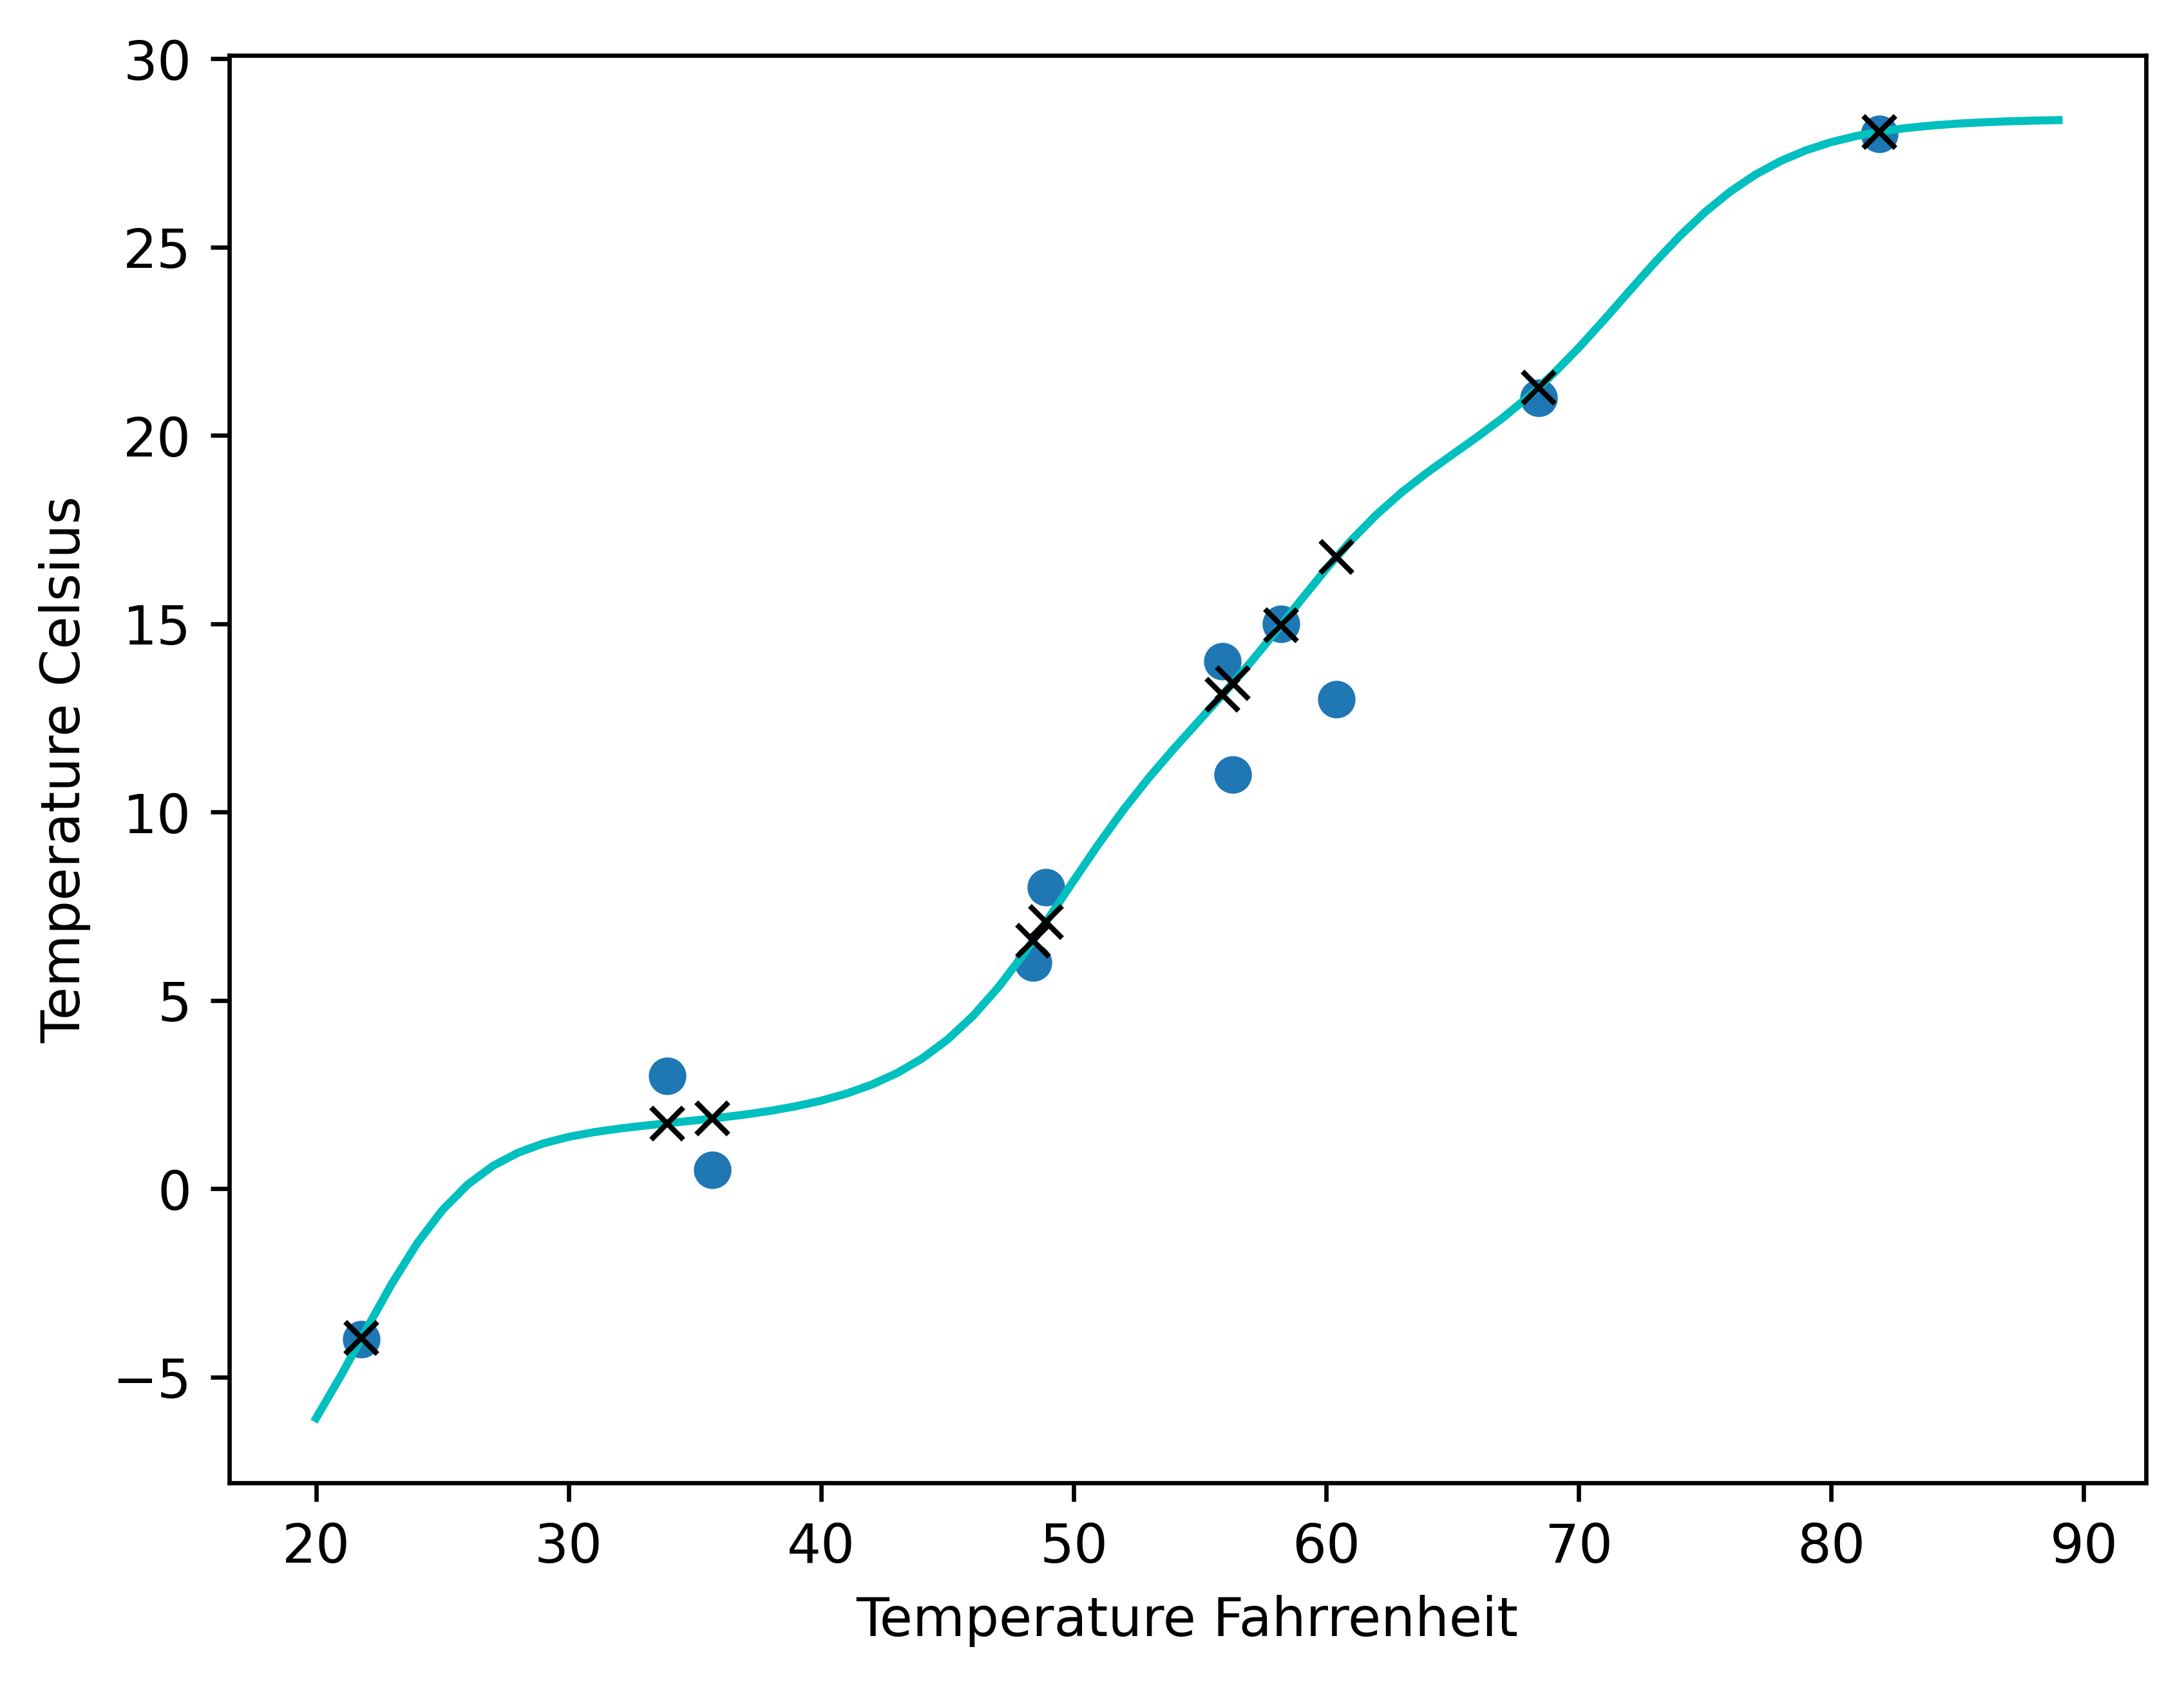

In [110]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)

plt.xlabel("Temperature Fahrrenheit")
plt.ylabel("Temperature Celsius")

plt.plot(t_u.numpy(), t_c.numpy(), "o")
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), "c-")
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), "kx")

plt.savefig("temp_unknow_plot.png", format="png")